# Advanced Analytics Survey Results (Before)

Very short survey on AA awareness in Borealis send out to 158 people in different spokes.
1. Are you **aware** of the Borealis initiative around Advanced Analytics?
2. Have you attended a presentation or info **session** on Advanced Analytics?
3. Can you quote one possible **area** of application to generate value from data in your department using Advanced Analytics? If yes, please describe. [Open]
4. Do you know who your **Analytics Coordinator** is?
5. Please describe in a few words the **role** of your analytics coordinator. [Open]
6. If you have any **feedback** on Advanced Analytics, please feel free to comment below. [Open]


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
sns.set(style="whitegrid")

#### Load the raw survey results

In [4]:
fn = '\\\me0255\users$\MECLIJDA\Data Science\Survey\AASurveyResults.xlsx'
df = pd.read_excel(fn)
colnames = df.columns.tolist()

#### Rename questions to column names

In [5]:
df.columns = ['Creator','Aware','Session','AppArea','ACN','RoleACN','Feedback','ItemType','Path','Spoke','Dep','Topic']

#### Drop the name of the person who entered the survey (anonymisation)

In [6]:
df.drop(['Creator'], axis = 1 , inplace= True,errors= 'ignore')

### Survey Setup

In [95]:
dfSurveySetup = pd.DataFrame({'Spoke':['Business Support','Fertiliser','Operations','HC&E','Innotech','PO'],
                                       'TotalCount':[35,38,33,10,15,27]})
TotalSurveyPopulation = dfSurveySetup['TotalCount'].sum()
print('Response Rate: ' + "%.1f" % (len(df)*100/float(TotalSurveyPopulation)) + '% - ' + str(len(df)) + " responses out of " + str(TotalSurveyPopulation))
df1 = df['Spoke'].value_counts().to_frame(name='ResponseCount').reset_index()
df2 = pd.merge(dfSurveySetup,df1,left_on=dfSurveySetup['Spoke'],right_on=df1['index'])
df2['ResRate'] = df2['ResponseCount']/df2['TotalCount']
df2.drop('index',axis=1,inplace=True)
df2.sort_values(['TotalCount','ResponseCount'],ascending=[False,False],inplace=True)

Response Rate: 30.4% - 48 responses out of 158


### Who responded to the survey?

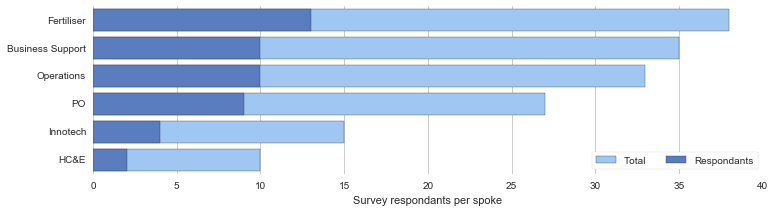

In [96]:
f, ax = plt.subplots(figsize=(12, 3))
sns.set_color_codes("pastel")
sns.barplot(x="TotalCount", y="Spoke", data=df2,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="ResponseCount", y="Spoke", data=df2,
            label="Respondants", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 40), ylabel="",
       xlabel="Survey respondants per spoke")
sns.despine(left=True, bottom=True)
sns.plt.show()

### Are you aware of the Borealis initiative around Advanced Analytics?

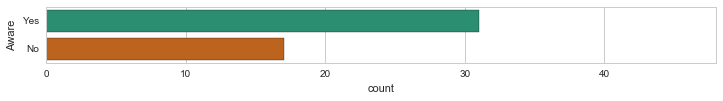

64.6% are aware


In [70]:
plt.figure(figsize=(12,1))
plt.xlim(0,len(df))
sns.countplot(y="Aware",data=df,order=['Yes','No'],palette="Dark2")
#sns.plt.title(colnames(1))
sns.plt.show()
pct = sum(df['Aware']=='Yes')*100.0/len(df['Aware'])
print("%.1f" % pct + "% are aware")

In [97]:
df_notaware = df[df['Aware']=='No']
df_notaware['Spoke'].value_counts().to_frame()

,Spoke
PO,5
Operations,5
Business Support,4
Fertiliser,3


### Have you attended a presentation or info session on Advanced Analytics?

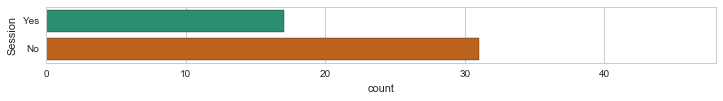

35.4% have attended a session


In [10]:
plt.figure(figsize=(12,1))
plt.xlim(0,len(df))
sns.countplot(y="Session",data=df,order=['Yes','No'],palette="Dark2")
plt.show()
pct = sum(df['Session']=='Yes')*100.0/len(df['Session'])
print("%.1f" % pct + "% have attended a session")

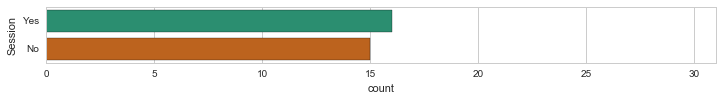

51.6% of those who are aware have attended a session


In [11]:
plt.figure(figsize=(12,1))
df_aware = df[df['Aware']=='Yes']
plt.xlim(0,len(df_aware))
sns.countplot(y="Session",data=df_aware,order=['Yes','No'],palette="Dark2")
plt.show()
pct = sum(df_aware['Session']=='Yes')*100.0/len(df_aware['Session'])
print("%.1f" % pct + "% of those who are aware have attended a session")

How are people aware without attending a session? word of mouth?

### Do you know who your Analytics Coordinator is?

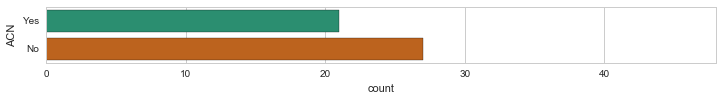

43.8% know the analytics coordinator


In [12]:
plt.figure(figsize=(12,1))
plt.xlim(0,len(df))
sns.countplot(y="ACN",data=df,order=['Yes','No'],palette="Dark2")
plt.show()
pct = sum(df['ACN']=='Yes')*100.0/len(df['ACN'])
print("%.1f" % pct + "% know the analytics coordinator")

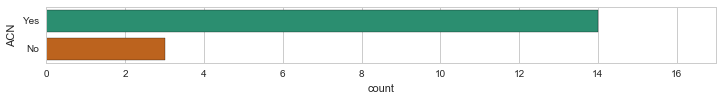

82.4% of those who have attended a session know who the analytics coordinator is.


In [13]:
plt.figure(figsize=(12,1))
df_session = df[df['Session']=='Yes']
plt.xlim(0,len(df_session))
sns.countplot(y="ACN",data=df_session,order=['Yes','No'],palette="Dark2")
plt.show()
pct = sum(df_session['ACN']=='Yes')*100.0/len(df_session['ACN'])
print("%.1f" % pct + "% of those who have attended a session know who the analytics coordinator is.")

Lesson learned: Make even more clear who the analytics coordinator is in the sessions to come.

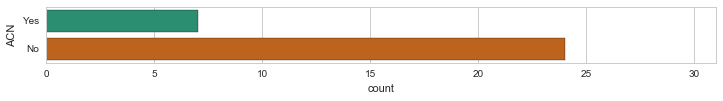

22.6% of those who have NOT attended a session know who the analytics coordinator is!


In [14]:
plt.figure(figsize=(12,1))
df_session = df[df['Session']=='No']
plt.xlim(0,len(df_session))
sns.countplot(y="ACN",data=df_session,order=['Yes','No'],palette="Dark2")
plt.show()
pct = sum(df_session['ACN']=='Yes')*100.0/len(df_session['ACN'])
print("%.1f" % pct + "% of those who have NOT attended a session know who the analytics coordinator is!")

In [15]:
L=[x.split(", ") for x in df['Topic'].dropna().tolist()]
pd.unique([item for sublist in L for item in sublist])

array([u'dashboard', u'upset analysis', u'demand side management',
       u'n-pilot analysis', u'energy efficiency',
       u'innotech test results analysis', u'data management',
       u'marketing & market area analysis', u'Statistical forecasting',
       u'APC', u'predictive maintenance', u'reliability',
       u'price prediction', u'customer behaviour', u'patent mining',
       u'workforce prediction', u'process data analytics',
       u'HR future planning', u'quality control',
       u'preventive maintenance', u'product pricing',
       u'market intelligence'], dtype=object)

Several ideas have been proposed. They can be categorised according to the spokes:
- **Operations**: upset analysis, energy efficiency, APC, predictive maintenance, reliability, process data analysis, quality control
- **Business (Polyolefins, Fertilizer, HC&E)**: demand side management, marketing & market area analysis, statistical forecasting, price prediction, customer behaviour, product pricing, market intelligence, n-pilot analysis
- **Business Support**: workforce prediction, HR future planning
- **Innotech**: test result analysis, patent mining

In [16]:
from __future__ import print_function
from time import time
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation

n_samples = 2000
n_features = 1000
n_topics = 10
n_top_words = 20


def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic #%d:" % (int(topic_idx)+1))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
    print()


In [17]:
# Use tf-idf features for NMF.
print("Extracting tf-idf features for NMF...")
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=1,
                                   max_features=n_features,
                                   stop_words='english')
t0 = time()
data_samples = df['AppArea'].dropna().tolist()
tfidf = tfidf_vectorizer.fit_transform(data_samples)
#print(data_samples)
print("done in %0.3fs." % (time() - t0))
voc = tfidf_vectorizer.get_feature_names()
toplist = tfidf.A.sum(axis=0).argsort()[::-1][:n_top_words]
top_tfidf_df = pd.DataFrame({'idx': toplist, 'tfidfsum': [tfidf.A.sum(axis=0)[i] for i in toplist], 'term': [voc[i] for i in toplist]})
top_tfidf_df.set_index(['idx'],inplace=True)
top_tfidf_df

Extracting tf-idf features for NMF...
done in 0.000s.


,term,tfidfsum
idx,,
149,really,2.302608
49,data,2.151702
68,forecast,1.880705
123,pilot,1.671096
9,analytics,1.583914
26,business,1.459515
5,advanced,1.417923
169,statistical,1.346580
12,area,1.268564


In [18]:
# Use tf (raw term count) features for LDA.
print("Extracting tf features for LDA...")
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2,
                                max_features=n_features,
                                stop_words='english')
t0 = time()
tf = tf_vectorizer.fit_transform(data_samples)
print("done in %0.3fs." % (time() - t0))
voc = tf_vectorizer.get_feature_names()
toplist = tf.A.sum(axis=0).argsort()[::-1][:n_top_words]
top_tf_df = pd.DataFrame({'idx': toplist, 'tfsum': [tf.A.sum(axis=0)[i] for i in toplist], 'term': [voc[i] for i in toplist]})
top_tf_df.set_index(['idx'],inplace=True)
top_tf_df

Extracting tf features for LDA...
done in 0.000s.


,term,tfsum
idx,,
10,data,11
0,advanced,6
2,analytics,5
41,sales,4
39,reliability,4
6,business,4
8,cost,4
33,process,4
15,forecast,4


In [19]:
# Fit the NMF model
print("Fitting the NMF model with tf-idf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
t0 = time()
nmf = NMF(n_components=n_topics, random_state=1,
          alpha=.1, l1_ratio=.5).fit(tfidf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in NMF model:")
tfidf_feature_names = tfidf_vectorizer.get_feature_names()
print_top_words(nmf, tfidf_feature_names, n_top_words)

Fitting the NMF model with tf-idf features, n_samples=2000 and n_features=1000...
done in 0.281s.

Topics in NMF model:
Topic #1:
really information sounds philosophy good mail leadership equipment forecasting forecast finding fertilizer extract expect excellence evaluate engagement fuse energy don
Topic #2:
pilot lims datamanagement management data service satelite biomass combine measurements development analyse steering activities use sales forecasting forecast finding fertilizer
Topic #3:
forecast statistical improve accuracy prices fertilizer forecasting sales sure planning area forecasts challenge setup plánning toe tool doing provided apo
Topic #4:
reliability quality leadership kpi improvement cost aa plants fertilizer control use respectively related plant data apo extract future fuse forecasts
Topic #5:
customer behaviour cancellation change predict ordering extract future fuse forecasts forecasting forecast finding fertilizer workforce generated excellence evaluate equipment

In [20]:
print("Fitting LDA models with tf features, "
      "n_samples=%d and n_features=%d..."
      % (n_samples, n_features))
lda = LatentDirichletAllocation(n_topics=n_topics, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
t0 = time()
lda.fit(tf)
print("done in %0.3fs." % (time() - t0))

print("\nTopics in LDA model:")
tf_feature_names = tf_vectorizer.get_feature_names()
print_top_words(lda, tf_feature_names, n_top_words)

Fitting LDA models with tf features, n_samples=2000 and n_features=1000...
done in 0.078s.

Topics in LDA model:
Topic #1:
data advanced analytics cost leadership related future reliability support process equipment hr fertilizer performance forecasting maintenance operations business possibilities results
Topic #2:
forecast really fertilizer improve better support new analytics market planning provide advanced demand use future control process hr performance customer
Topic #3:
preventive hr improve management analytics pilot support better use market data forecasting provide team sales area planning operations forecast really
Topic #4:
pilot market data area maintenance new sales analysis management use possibilities product forecasting preventive analytics control related business customer advanced
Topic #5:
need data related performance statistical support better plant business preventive market customer pilot forecast provide new advanced reliability future quality
Topic #6:
busine